In [1]:
from google.colab import files
uploaded = files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads.csv


**Importing the libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importing the dataset**

In [4]:
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
data.shape

(400, 5)

In [6]:
X = data.iloc[:,1:4]
y = data.iloc[:,-1]

In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('encoder', OneHotEncoder(),[0])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))
X

array([[0.0e+00, 1.0e+00, 1.9e+01, 1.9e+04],
       [0.0e+00, 1.0e+00, 3.5e+01, 2.0e+04],
       [1.0e+00, 0.0e+00, 2.6e+01, 4.3e+04],
       ...,
       [1.0e+00, 0.0e+00, 5.0e+01, 2.0e+04],
       [0.0e+00, 1.0e+00, 3.6e+01, 3.3e+04],
       [1.0e+00, 0.0e+00, 4.9e+01, 3.6e+04]])

**Splitting the dataset into the Training set and Test set**

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.20, random_state=0)

**Feature Scaling**

In [9]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train[:,2:] = sc.fit_transform(X_train[:,2:])
X_test[:,2:] = sc.fit_transform(X_test[:,2:])

**Fitting K-NN to the Training set**

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

**Predicting the Test set results**

In [11]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

**Making the Confusion Matrix**

In [12]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test,y_pred)
conf_matrix

array([[53,  5],
       [ 1, 21]])

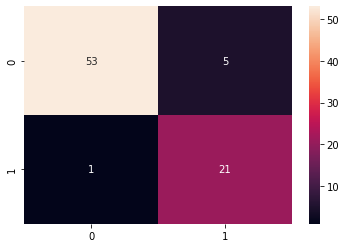

In [13]:
import seaborn as sns
sns.heatmap(conf_matrix, annot=True)

In [14]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_test,y_pred)
acc

0.925